# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build query url
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="
count = 0

# open new file for data
with open("output_data/weather_data.csv", "w") as weather_data:
    weather_writer = csv.writer(weather_data, delimiter=",")
    weather_writer.writerow(["City", "Lat", "Lng", "Max Temp", \
                            "Humidity", "Cloudiness", "Wind Speed", \
                            "Country", "Date"])
    print("Beginning Data Retrieval")
    print("-----------------------------------")
    
    # loop for api requests
    for city1 in cities:
        query_url= url + city1
        weather_json=requests.get(query_url).json()
        try:
            lat = weather_json["coord"]["lat"]
            lng = weather_json["coord"]["lon"]
            max_temp = round(weather_json["main"]["temp_max"] * 9 / 5 - 459.67, 2)
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            country = weather_json["sys"]["country"]
            date = weather_json["dt"]
        except KeyError:
            print("City not found. Skipping...")
            continue 
        weather_writer.writerow([city1, lat, lng, max_temp, humidity, \
                            cloudiness, wind_speed, country, date])
        count += 1
        print(f"Processing Record {count} | {city1}")
    print("-----------------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------------")


Beginning Data Retrieval
-----------------------------------
Processing Record 1 | mount gambier
Processing Record 2 | butaritari
Processing Record 3 | tiznit
Processing Record 4 | aquidauana
Processing Record 5 | wenatchee
Processing Record 6 | bilibino
Processing Record 7 | pampierstad
Processing Record 8 | busselton
Processing Record 9 | yulara
Processing Record 10 | dong hoi
Processing Record 11 | malartic
Processing Record 12 | biak
City not found. Skipping...
Processing Record 13 | victoria
Processing Record 14 | smoky lake
Processing Record 15 | bobrovytsya
Processing Record 16 | hermanus
Processing Record 17 | east london
Processing Record 18 | rikitea
Processing Record 19 | perth
Processing Record 20 | mar del plata
Processing Record 21 | provideniya
Processing Record 22 | gazli
Processing Record 23 | ushuaia
Processing Record 24 | kapaa
Processing Record 25 | russell
Processing Record 26 | westport
Processing Record 27 | miandoab
Processing Record 28 | iqaluit
Processing Reco

Processing Record 234 | kaitangata
Processing Record 235 | magsaysay
Processing Record 236 | black river
Processing Record 237 | polyarnyy
Processing Record 238 | jambi
Processing Record 239 | glazov
Processing Record 240 | wagar
Processing Record 241 | kaputa
Processing Record 242 | salinas
Processing Record 243 | hobyo
Processing Record 244 | mikuni
Processing Record 245 | saint george
Processing Record 246 | am timan
Processing Record 247 | vostok
Processing Record 248 | sfantu gheorghe
Processing Record 249 | naze
Processing Record 250 | bocas del toro
Processing Record 251 | mazagao
City not found. Skipping...
Processing Record 252 | maposeni
Processing Record 253 | kidal
Processing Record 254 | truro
Processing Record 255 | kamyshlov
Processing Record 256 | luang prabang
Processing Record 257 | bambous virieux
Processing Record 258 | campana
Processing Record 259 | abu dhabi
Processing Record 260 | half moon bay
Processing Record 261 | flagstaff
Processing Record 262 | rimbey
Pro

Processing Record 463 | vila franca do campo
Processing Record 464 | college
City not found. Skipping...
Processing Record 465 | bushehr
Processing Record 466 | aranos
Processing Record 467 | oriximina
Processing Record 468 | kushiro
Processing Record 469 | salisbury
Processing Record 470 | talara
Processing Record 471 | takhtamygda
Processing Record 472 | banamba
Processing Record 473 | beringovskiy
Processing Record 474 | saint anthony
Processing Record 475 | hervey bay
Processing Record 476 | svetlyy
Processing Record 477 | bestobe
City not found. Skipping...
Processing Record 478 | kuybysheve
Processing Record 479 | galesong
Processing Record 480 | rupert
Processing Record 481 | mayo
Processing Record 482 | henties bay
Processing Record 483 | tirat karmel
Processing Record 484 | montepuez
Processing Record 485 | usinsk
Processing Record 486 | ambon
Processing Record 487 | oil city
Processing Record 488 | syracuse
Processing Record 489 | kimbe
Processing Record 490 | sovetskiy
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Import csv to a dataframe and then check column counts. 
city_data = pd.read_csv("output_data/weather_data.csv")
city_data["Country"] = city_data["Country"].fillna("NA")
city_data.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display the dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount gambier,-37.83,140.77,44.60,87,90,2.10,AU,1595426525
1,butaritari,3.07,172.79,82.76,77,1,6.22,KI,1595426769
2,tiznit,29.58,-9.50,96.49,22,0,3.28,MA,1595426769
3,aquidauana,-20.47,-55.79,86.13,29,90,0.99,BR,1595426769
4,wenatchee,47.42,-120.31,73.40,49,1,6.70,US,1595426769


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data["Humidity"].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = city_data[city_data["Humidity"] > 100].index.tolist()
print(index)

[]


In [8]:
# calculate outliers for Humidity
humidity_series = city_data["Humidity"]
quartiles = humidity_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Humidity values below {round(lower_bound, 2)} and above \
{round(upper_bound, 2)} could be outliers.")

Humidity values below 10.0 and above 130.0 could be outliers.


In [9]:
# Get the indices of cities that have humidity lower than the lower_bound. 
# All test runs on data have not included any humidity above upper_bound. 
index_outliers = city_data[city_data["Humidity"] < lower_bound].index.tolist()
print(index_outliers)

[21, 265, 398, 409]


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
# which we call "clean_city_data".
clean_city_data = city_data.drop(index_outliers)
clean_city_data.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [11]:
# Extract relevant fields from the data frame
final_city_data = clean_city_data[["City", "Lat", "Lng", "Max Temp", \
                                   "Humidity", "Cloudiness", "Wind Speed", "Country"]]

# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

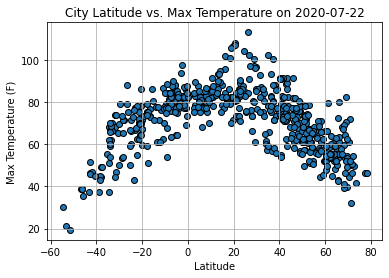

In [12]:
from datetime import date
today = date.today()

latitude = final_city_data["Lat"]
maximum_temperature = final_city_data["Max Temp"]

plt.scatter(latitude, maximum_temperature, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature on {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

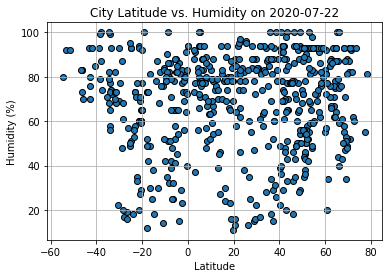

In [13]:
humidity1 = final_city_data["Humidity"]

plt.scatter(latitude, humidity1, edgecolors="black")
plt.title(f"City Latitude vs. Humidity on {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

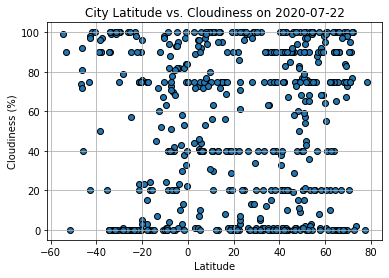

In [14]:
cloudiness1 = final_city_data["Cloudiness"]

plt.scatter(latitude, cloudiness1, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness on {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

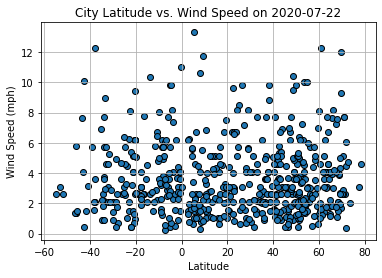

In [15]:
wind_speed1 = final_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed1, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed on {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern = final_city_data[final_city_data["Lat"] >= 0]
southern = final_city_data[final_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5050412685542933


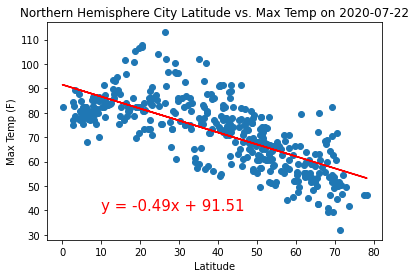

In [18]:
n_lat = northern["Lat"]
n_max_temp = northern["Max Temp"]
x_values = n_lat
y_values = n_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig5.png")
plt.show()

In the northern hemisphere, maximum temperature and latitude are negatively correlated. As latitude goes up, moving farther away from the equator, maximum temperature goes down. The closer you are to the equator, the warmer the weather is. The relationship is fairly robust, the r-squared was 0.49 in my run of the data. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6377528974526123


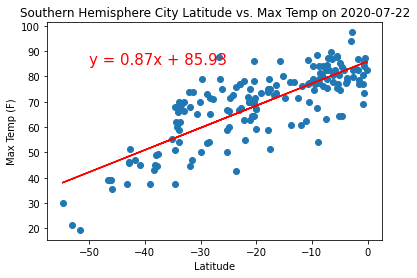

In [19]:
s_lat = southern["Lat"]
s_max_temp = southern["Max Temp"]
x_values = s_lat
y_values = s_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig6.png")
plt.show()

In the southern hemisphere, maximum temperature and latitude are positively correlated. As latitude goes up, moving closer to the equator, maximum temperature goes up. The closer you are to the equator, the warmer the weather is. The relationship is robust, the r-squared was 0.70 in my run of the data. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001655256185613599


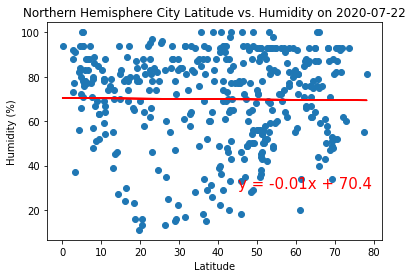

In [20]:
n_humidity = northern["Humidity"]
x_values = n_lat
y_values = n_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig7.png")
plt.show()

In the northern hemisphere, latitude and humidity are not strongly correlated. In my run of the data, the slope was -0.01 and the r-squared was 0.0002. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04076410848257611


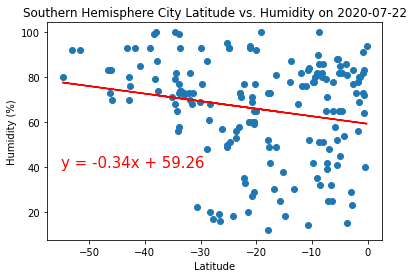

In [21]:
s_humidity = southern["Humidity"]
x_values = s_lat
y_values = s_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0010236370820108824


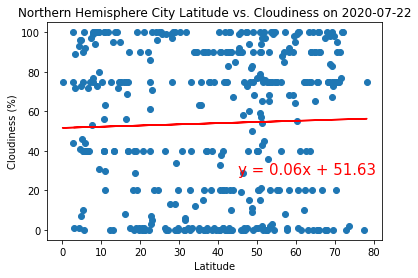

In [22]:
n_cloudiness = northern["Cloudiness"]
x_values = n_lat
y_values = n_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00743745396808382


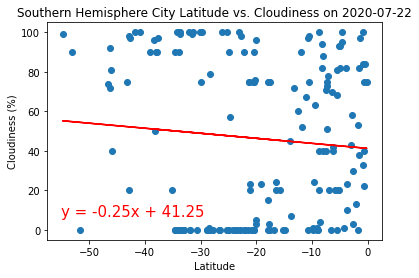

In [23]:
s_cloudiness = southern["Cloudiness"]
x_values = s_lat
y_values = s_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008409319786499142


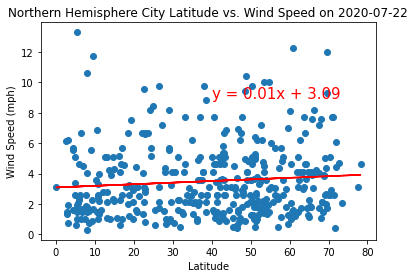

In [24]:
n_wind_speed = northern["Wind Speed"]
x_values = n_lat
y_values = n_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,9),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005519238535415314


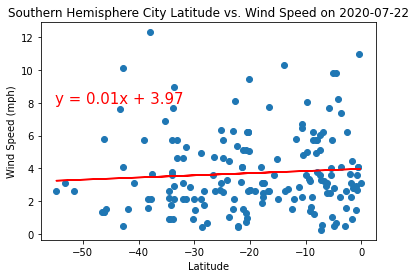

In [25]:
s_wind_speed = southern["Wind Speed"]
x_values = s_lat
y_values = s_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig12.png")
plt.show()